# Import Librabries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

# Import Dataset

In [3]:
data = pd.read_csv('Fault.csv', header=None, sep='\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


# Exploratory Data Analysis

In [4]:
data.shape

(1941, 34)

In [5]:
d = np.array(data)

In [6]:
target = []
for i in range(d.shape[0]):
  if d[i][27] == 1 and d[i][28] == 0 and d[i][29] == 0 and d[i][30] == 0 and d[i][31] == 0 and d[i][32] == 0 and d[i][33] == 0:
    target.append(1)

  if d[i][27] == 0 and d[i][28] == 1 and d[i][29] == 0 and d[i][30] == 0 and d[i][31] == 0 and d[i][32] == 0 and d[i][33] == 0:
    target.append(2)
  
  if d[i][27] == 0 and d[i][28] == 0 and d[i][29] == 1 and d[i][30] == 0 and d[i][31] == 0 and d[i][32] == 0 and d[i][33] == 0:
    target.append(3)

  if d[i][27] == 0 and d[i][28] == 0 and d[i][29] == 0 and d[i][30] == 1 and d[i][31] == 0 and d[i][32] == 0 and d[i][33] == 0:
    target.append(4)

  if d[i][27] == 0 and d[i][28] == 0 and d[i][29] == 0 and d[i][30] == 0 and d[i][31] == 1 and d[i][32] == 0 and d[i][33] == 0:
    target.append(5)

  if d[i][27] == 0 and d[i][28] == 0 and d[i][29] == 0 and d[i][30] == 0 and d[i][31] == 0 and d[i][32] == 1 and d[i][33] == 0:
    target.append(6)
    
  if d[i][27] == 0 and d[i][28] == 0 and d[i][29] == 0 and d[i][30] == 0 and d[i][31] == 0 and d[i][32] == 0 and d[i][33] == 1:
    target.append(7)

In [7]:
target = np.array(target)
target.shape

(1941,)

In [8]:
data = data.drop(columns = [27,28,29,30,31,32,33])

In [9]:
data['class'] = target

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


In [11]:
data['class'].value_counts()

7    673
6    402
3    391
2    190
1    158
4     72
5     55
Name: class, dtype: int64

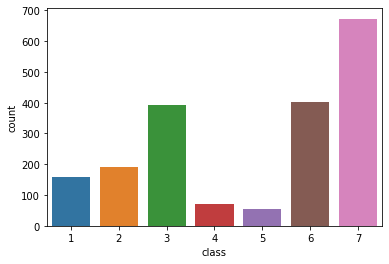

In [12]:
sn.countplot(data=data, x='class')

In [13]:
## Check Null Values
data.isnull().sum().sum()

0

In [14]:
columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']
classes = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [15]:
len(columns), len(classes)

(27, 7)

In [16]:
target = data['class']
features = data.drop(columns = ['class'])

In [17]:
features.shape

(1941, 27)

In [18]:
target.shape

(1941,)

In [19]:
features.describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


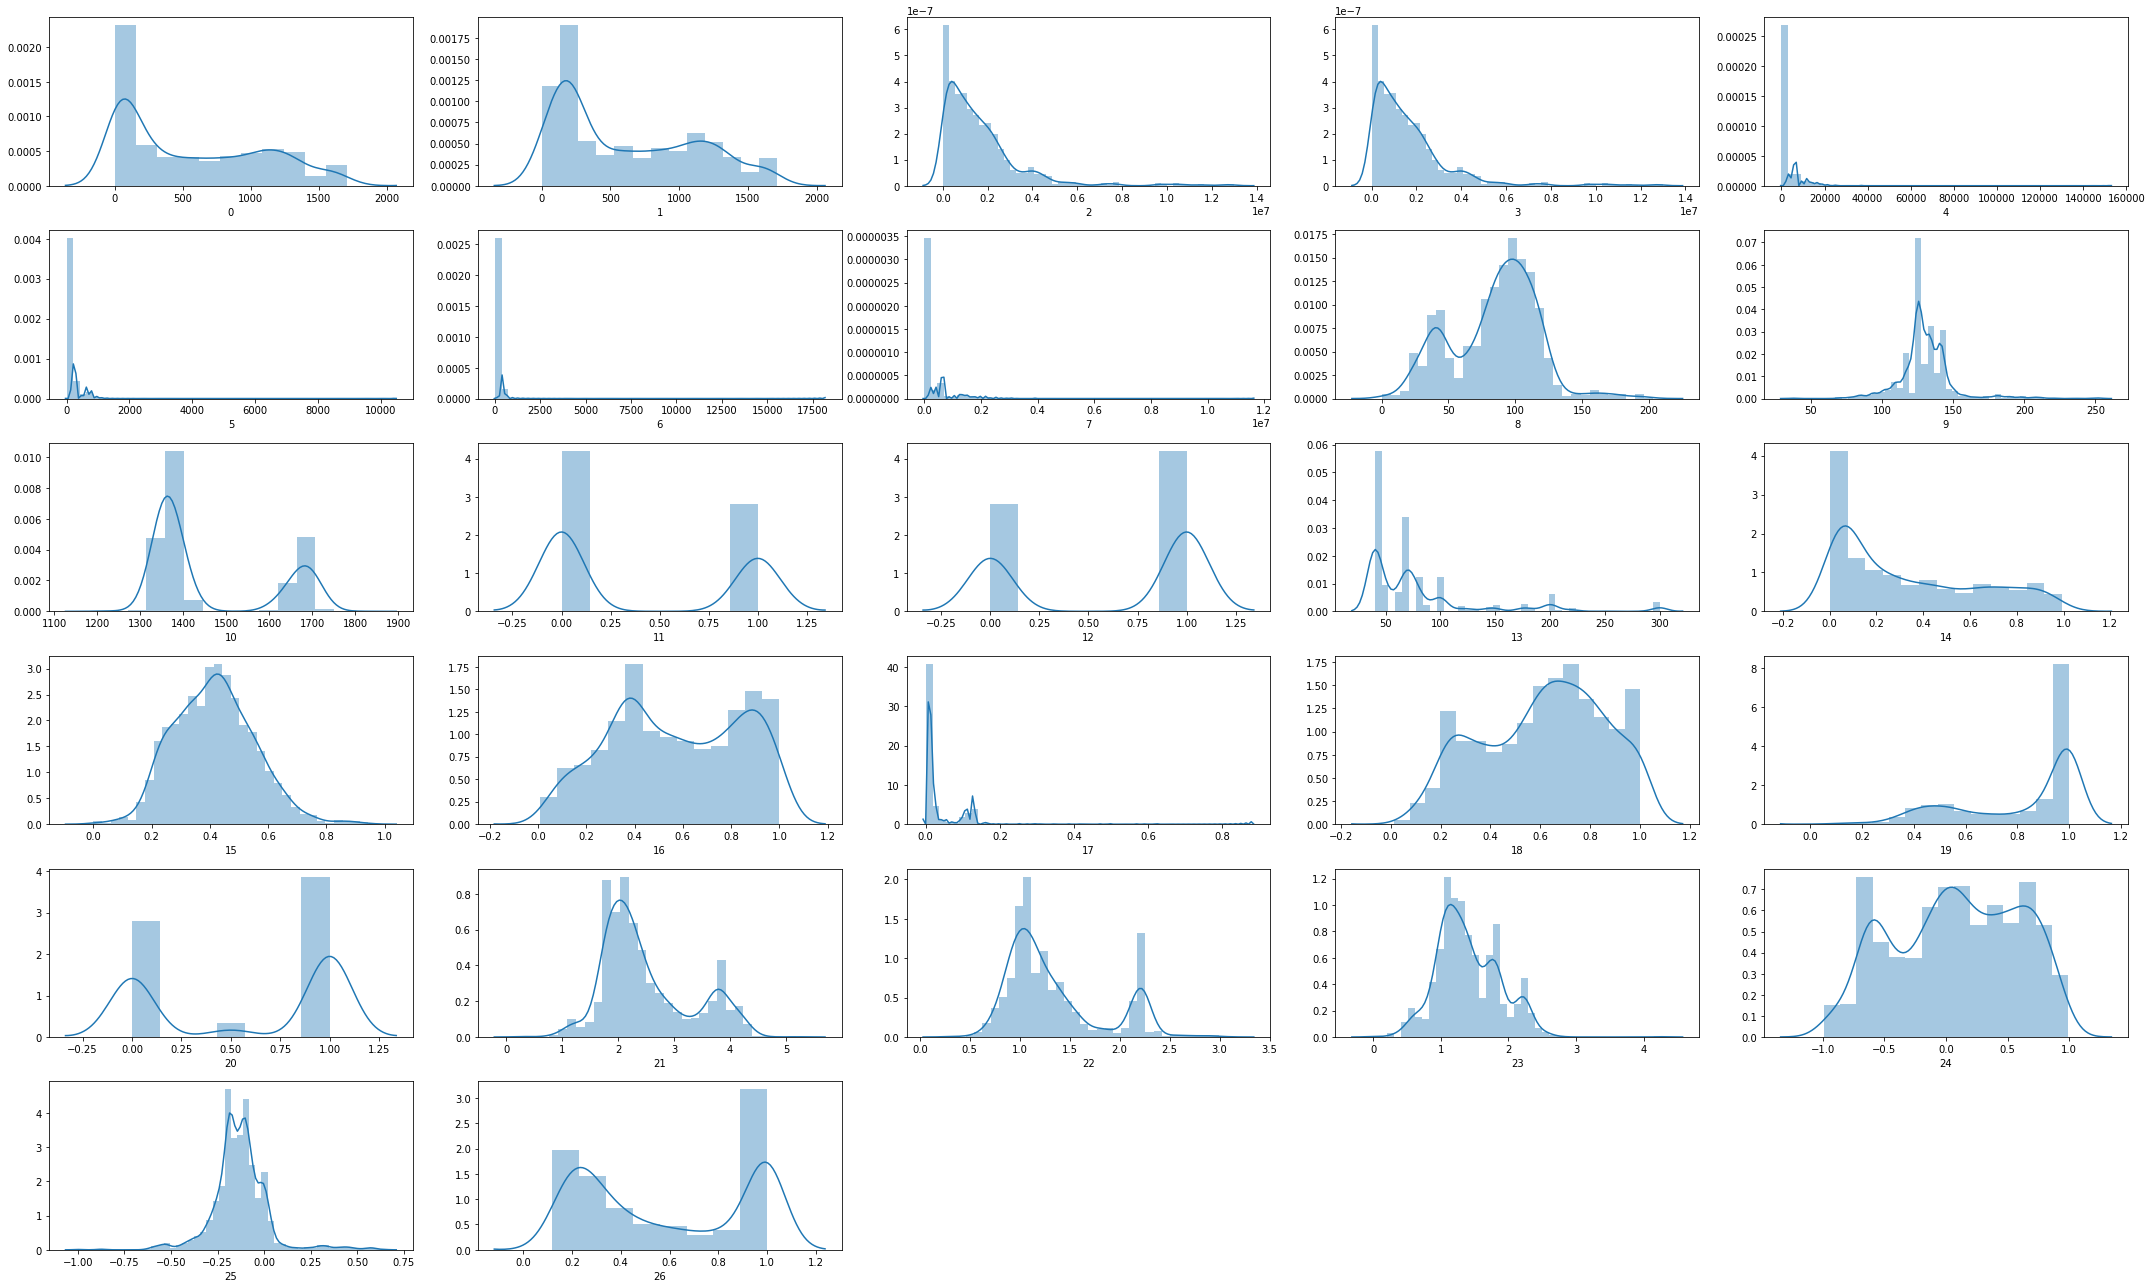

In [20]:
fig = plt.figure(figsize=(30,18))
for i in range(27):
    ax = fig.add_subplot(6,5,i+1)
#     print(columns[i])
    sn.distplot(features.iloc[:,i], ax=ax)
plt.tight_layout()
plt.show()
# sn.distplot(features[0])

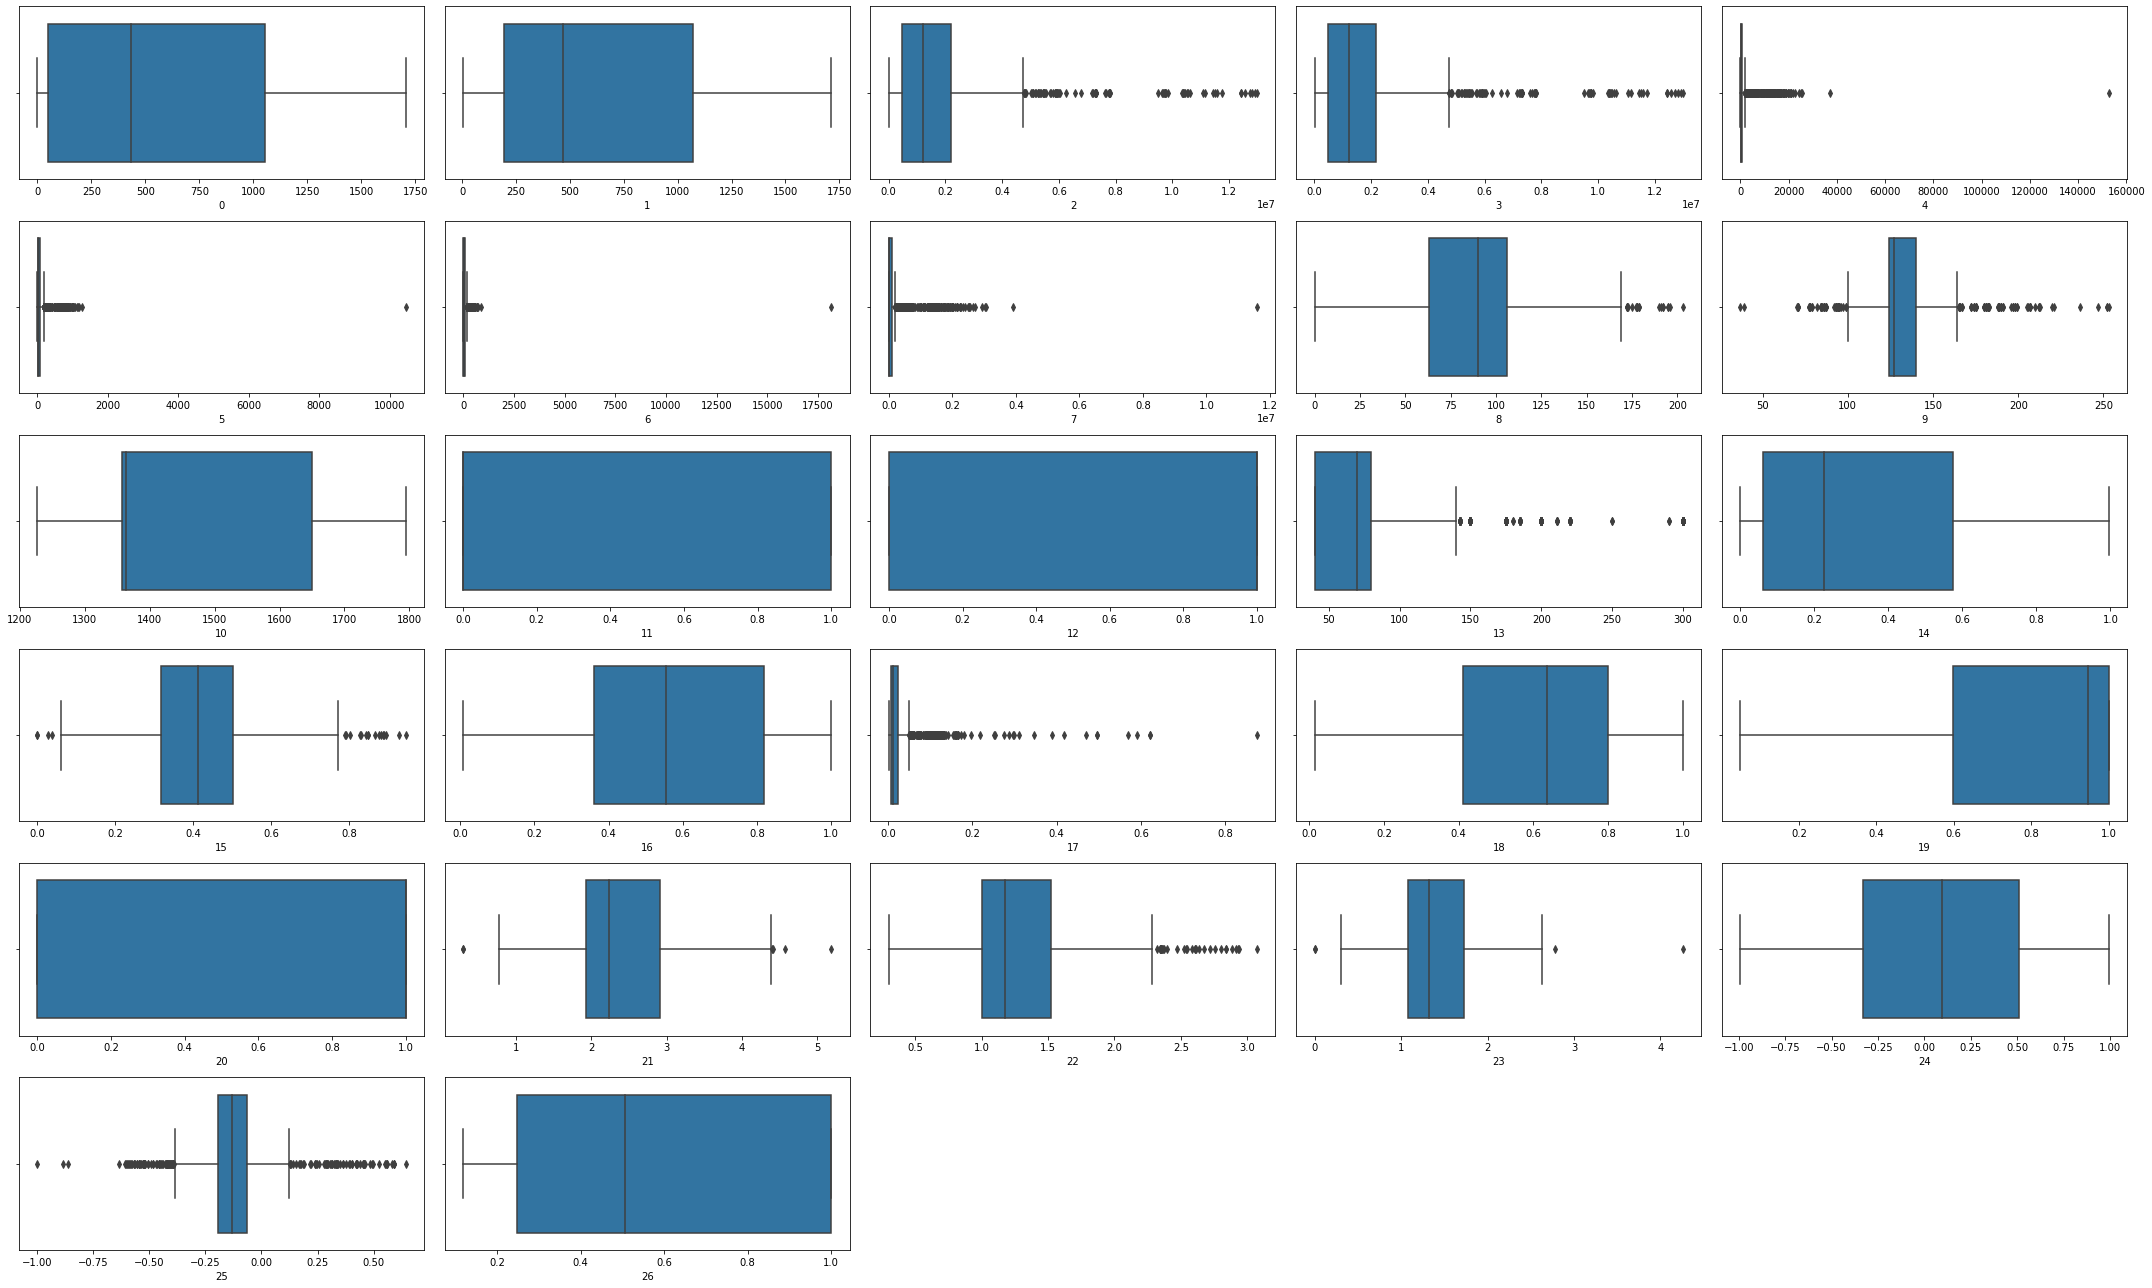

In [21]:
fig = plt.figure(figsize=(30,18))
for i in range(27):
    ax = fig.add_subplot(6,5,i+1)
    sn.boxplot(features.iloc[:,i], ax=ax)
plt.tight_layout()
plt.show()

In [22]:
## Log Transformation on skewed data
features[4] = np.log(features[4])
features[5] = np.log(features[5])
features[6] = np.log(features[6])
features[7] = np.log(features[7])

In [23]:
features[17] = np.log(features[17])

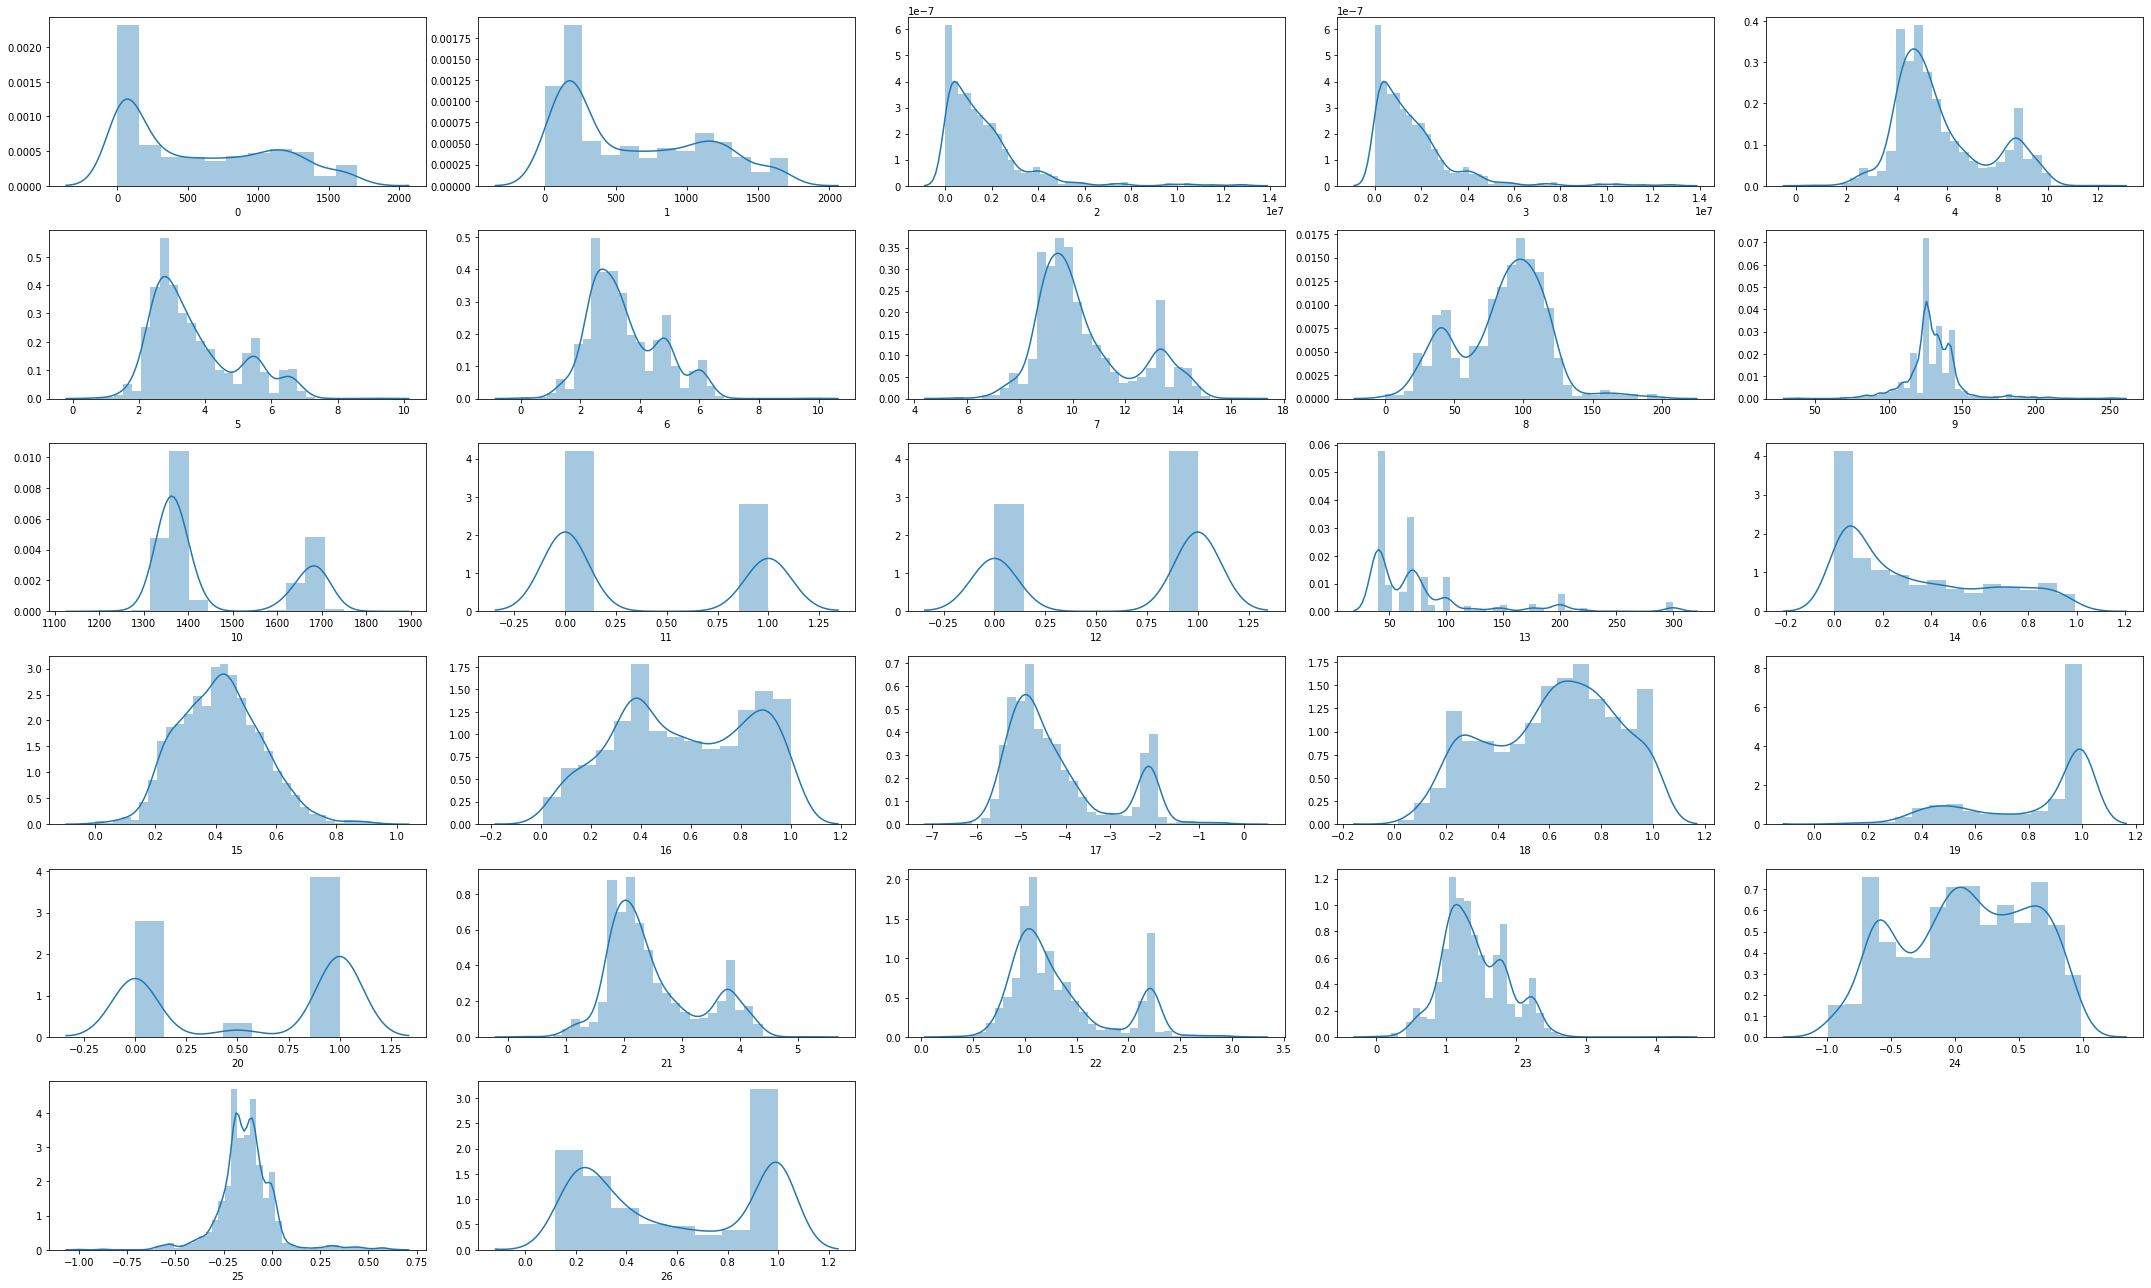

In [24]:
fig = plt.figure(figsize=(30,18))
for i in range(27):
    ax = fig.add_subplot(6,5,i+1)
#     print(columns[i])
    sn.distplot(features.iloc[:,i], ax=ax)
plt.tight_layout()
plt.show()

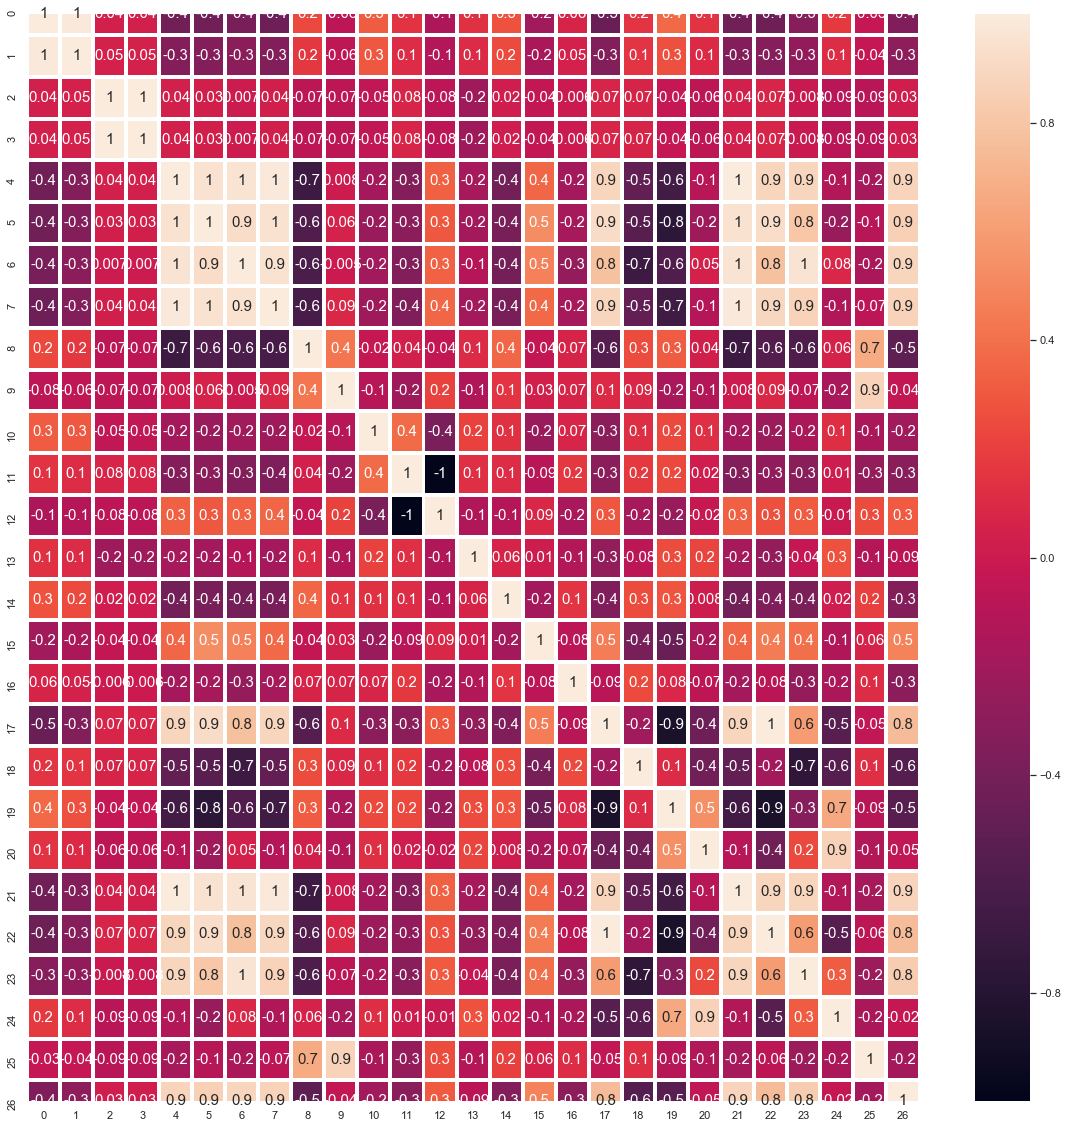

In [25]:
sn.set(style="white")
f, ax = plt.subplots(figsize=(20, 20))
sn.heatmap(features.corr(), annot=True, annot_kws={"size":15}, fmt='.1g', linewidths=3)

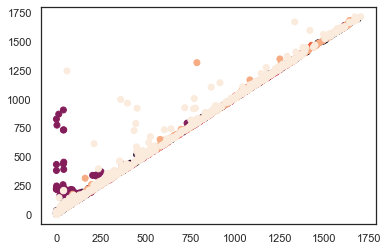

In [26]:
plt.scatter(features.iloc[:,0], features.iloc[:, 1], c=target)
plt.show()

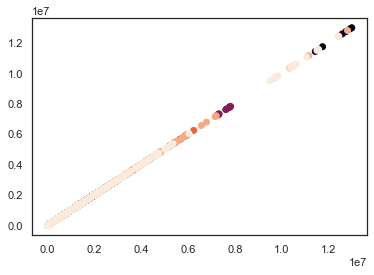

In [27]:
plt.scatter(features.iloc[:,2], features.iloc[:, 3], c=target)
plt.show()

In [28]:
## Preprocessing 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
data_sc = sc.fit_transform(data)

In [30]:
# train_sc = sc.transform(x_train)
# test_sc = sc.transform(x_test)

In [31]:
## Features reduction by PCA
pca = PCA()
pca.fit(data_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.explained_variance_ratio_

array([3.00776966e-01, 1.22487590e-01, 9.65828774e-02, 8.05098597e-02,
       7.04631012e-02, 6.02512958e-02, 5.03455028e-02, 3.76705147e-02,
       3.32007711e-02, 3.21899265e-02, 2.58866523e-02, 2.11398477e-02,
       1.89483416e-02, 1.40151776e-02, 1.05057820e-02, 8.29678754e-03,
       6.73400872e-03, 3.56905405e-03, 2.11823656e-03, 1.98106292e-03,
       1.58541678e-03, 4.25515668e-04, 2.49260039e-04, 4.84473370e-05,
       1.75547217e-05, 4.48345726e-07, 1.04790608e-12, 1.23486302e-33])

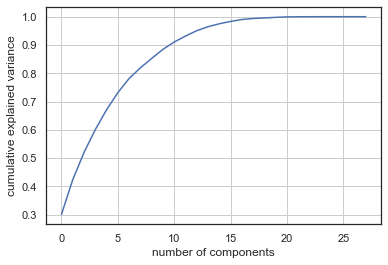

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
pca = PCA(18)
pca_data = pca.fit_transform(data_sc)

In [35]:
## LDA
# lda = LinearDiscriminantAnalysis()

In [36]:
## split data
x_train, x_test, y_train, y_test = train_test_split(data_sc, target, test_size=0.3)

# Model Building

In [37]:
model_accuracy = []
model_precision = []
model_recall = []

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
train_pred_logr = lr.predict(x_train)
test_pred_logr = lr.predict(x_test)

In [40]:
model_accuracy.append(accuracy_score(y_test, test_pred_logr)*100)
model_precision.append(precision_score(y_test, test_pred_logr, average='micro')*100)
model_recall.append(recall_score(y_test, test_pred_logr, average='micro')*100)

In [41]:
print("Training accuracy: ", accuracy_score(y_train, train_pred_logr))
print("Testing accuracy: ", accuracy_score(y_test, test_pred_logr))
print(classification_report(y_test, test_pred_logr))

Training accuracy:  0.9410898379970545
Testing accuracy:  0.9519725557461407
              precision    recall  f1-score   support

           1       0.96      0.89      0.93        56
           2       0.89      0.91      0.90        54
           3       0.98      1.00      0.99       119
           4       0.96      1.00      0.98        24
           5       0.90      0.60      0.72        15
           6       0.95      0.92      0.93       122
           7       0.95      0.99      0.97       193

    accuracy                           0.95       583
   macro avg       0.94      0.90      0.92       583
weighted avg       0.95      0.95      0.95       583



## Support Vector Machine

In [42]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
pred_train_svc = svc.predict(x_train)
pred_test_svc = svc.predict(x_test)

In [44]:
model_accuracy.append(accuracy_score(y_test, pred_test_svc)*100)
model_precision.append(precision_score(y_test, pred_test_svc, average='micro')*100)
model_recall.append(recall_score(y_test, pred_test_svc, average='micro')*100)

In [45]:
print("Training accuracy: ", accuracy_score(y_train, pred_train_svc))
print("Testing accuracy: ", accuracy_score(y_test, pred_test_svc))
print(classification_report(y_test, pred_test_svc))

Training accuracy:  0.9742268041237113
Testing accuracy:  0.9588336192109777
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        56
           2       0.96      0.94      0.95        54
           3       0.98      1.00      0.99       119
           4       1.00      0.96      0.98        24
           5       0.91      0.67      0.77        15
           6       0.94      0.91      0.93       122
           7       0.95      0.99      0.97       193

    accuracy                           0.96       583
   macro avg       0.96      0.92      0.94       583
weighted avg       0.96      0.96      0.96       583



## K- Nearest Neighbor

In [46]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
pred_train_knn = knn.predict(x_train)
pred_test_knn = knn.predict(x_test)

In [48]:
model_accuracy.append(accuracy_score(y_test, pred_test_knn)*100)
model_precision.append(precision_score(y_test, pred_test_knn, average='micro')*100)
model_recall.append(recall_score(y_test, pred_test_knn, average='micro')*100)

In [49]:
print("Training accuracy: ", accuracy_score(y_train, pred_train_knn))
print("Testing accuracy: ", accuracy_score(y_test, pred_test_knn))
print(classification_report(y_test, pred_test_knn))

Training accuracy:  0.8748159057437408
Testing accuracy:  0.8370497427101201
              precision    recall  f1-score   support

           1       0.98      0.93      0.95        56
           2       0.85      0.94      0.89        54
           3       0.97      0.96      0.96       119
           4       0.92      0.96      0.94        24
           5       0.86      0.80      0.83        15
           6       0.69      0.71      0.70       122
           7       0.80      0.77      0.78       193

    accuracy                           0.84       583
   macro avg       0.87      0.87      0.87       583
weighted avg       0.84      0.84      0.84       583



## Decision Tree Classifier 

In [50]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
pred_train_dtc = dtc.predict(x_train)
pred_test_dtc = dtc.predict(x_test)

In [52]:
model_accuracy.append(accuracy_score(y_test, pred_test_dtc)*100)
model_precision.append(precision_score(y_test, pred_test_dtc, average='micro')*100)
model_recall.append(recall_score(y_test, pred_test_dtc, average='micro')*100)

In [53]:
print("Training accuracy: ", accuracy_score(y_train, pred_train_dtc))
print("Testing accuracy: ", accuracy_score(y_test, pred_test_dtc))
print(classification_report(y_test, pred_test_dtc))

Training accuracy:  1.0
Testing accuracy:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00       122
           7       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



## Random Forest Classifier

In [76]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
pred_train_rfc = rfc.predict(x_train)
pred_test_rfc = rfc.predict(x_test)

In [78]:
model_accuracy.append(accuracy_score(y_test, pred_test_rfc)*100)
model_precision.append(precision_score(y_test, pred_test_rfc, average='micro')*100)
model_recall.append(recall_score(y_test, pred_test_rfc, average='micro')*100)

In [80]:
print("Training accuracy: ", accuracy_score(y_train, pred_train_rfc))
print("Testing accuracy: ", accuracy_score(y_test, pred_test_rfc))
print(classification_report(y_test, pred_test_rfc))

Training accuracy:  0.9992636229749632
Testing accuracy:  0.9897084048027445
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        56
           2       0.98      0.98      0.98        54
           3       0.99      1.00      1.00       119
           4       1.00      0.96      0.98        24
           5       1.00      0.80      0.89        15
           6       0.97      1.00      0.98       122
           7       1.00      1.00      1.00       193

    accuracy                           0.99       583
   macro avg       0.99      0.96      0.97       583
weighted avg       0.99      0.99      0.99       583



In [79]:
print("Accuracy ", model_accuracy)
print("Precision ", model_precision)
print("Recall ", model_recall)

Accuracy  [95.19725557461408, 95.88336192109776, 83.704974271012, 100.0, 98.97084048027445]
Precision  [95.19725557461408, 95.88336192109776, 83.704974271012, 100.0, 98.97084048027445]
Recall  [95.19725557461408, 95.88336192109776, 83.704974271012, 100.0, 98.97084048027445]


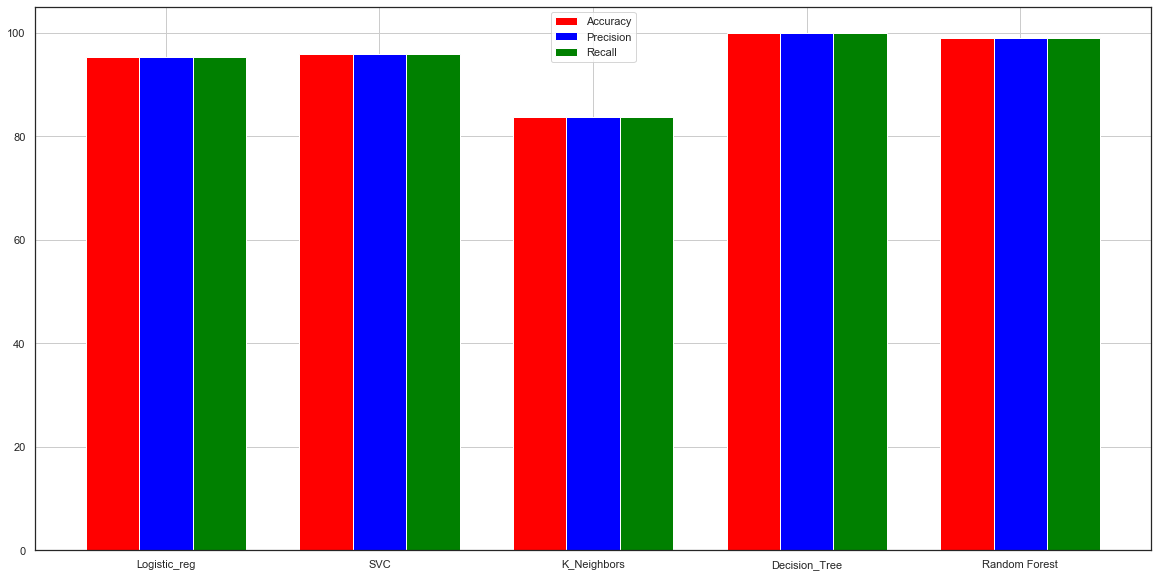

In [81]:
fig = plt.figure(figsize=(20,10))
r1 = np.arange(len(model_accuracy))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

plt.bar(r1, model_accuracy, color='red', width=0.25, edgecolor='white', label='Accuracy')
plt.bar(r2, model_precision, color='blue', width=0.25, edgecolor='white', label='Precision')
plt.bar(r3, model_recall, color='green', width=0.25, edgecolor='white', label='Recall')

plt.xticks([r + 0.25 for r in range(len(model_accuracy))], ['Logistic_reg', 'SVC', 'K_Neighbors', 'Decision_Tree', 'Random Forest'])

# plt.bar(np.arange(len(model_accuracy)), model_accuracy)
# plt.bar(np.arange(len(model_accuracy)), model_precision)
# plt.bar(np.arange(len(model_accuracy)), model_recal)
# plt.xticks(np.arange(len(model_accuracy)), ['Logistic_reg', 'SVC', 'K_Neighbors', 'Decision_Tree'])
plt.legend()
plt.grid()
plt.show()

# Model Building with PCA

In [55]:
## split pca data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_data, target, test_size=0.3)

In [56]:
model_pca_accuracy = []
model_pca_precision = []
model_pca_recall = []

## Logistic Regression with PCA

In [57]:
logr_pca = LogisticRegression()
logr_pca.fit(x_train_pca, y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pca_pred_train_logr = logr_pca.predict(x_train_pca)
pca_pred_test_logr = logr_pca.predict(x_test_pca)

In [59]:
model_pca_accuracy.append(accuracy_score(y_test_pca, pca_pred_test_logr)*100)
model_pca_precision.append(precision_score(y_test_pca, pca_pred_test_logr, average='micro')*100)
model_pca_recall.append(recall_score(y_test_pca, pca_pred_test_logr, average='micro')*100)

In [60]:
print("Training accuracy: ", accuracy_score(y_train_pca, pca_pred_train_logr))
print("Testing accuracy: ", accuracy_score(y_test_pca, pca_pred_test_logr))
print(classification_report(y_test_pca, pca_pred_test_logr))

Training accuracy:  0.9410898379970545
Testing accuracy:  0.9262435677530018
              precision    recall  f1-score   support

           1       0.90      0.88      0.89        52
           2       0.90      0.90      0.90        49
           3       0.98      0.98      0.98       124
           4       0.92      1.00      0.96        23
           5       1.00      0.78      0.88        18
           6       0.95      0.82      0.88       130
           7       0.89      0.99      0.94       187

    accuracy                           0.93       583
   macro avg       0.93      0.91      0.92       583
weighted avg       0.93      0.93      0.93       583



## Support Vector Machine with PCA

In [61]:
svc_pca = SVC()
svc_pca.fit(x_train_pca, y_train_pca)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
pca_pred_train_svc = svc_pca.predict(x_train_pca)
pca_pred_test_svc = svc_pca.predict(x_test_pca)

In [63]:
## updating metrics
model_pca_accuracy.append(accuracy_score(y_test_pca, pca_pred_test_svc)*100)
model_pca_precision.append(precision_score(y_test_pca, pca_pred_test_svc, average='micro')*100)
model_pca_recall.append(recall_score(y_test_pca, pca_pred_test_svc, average='micro')*100)

In [64]:
print("Training accuracy: ", accuracy_score(y_train_pca, pca_pred_train_svc))
print("Testing accuracy: ", accuracy_score(y_test_pca, pca_pred_test_svc))
print(classification_report(y_test_pca, pca_pred_test_svc))

Training accuracy:  0.9705449189985272
Testing accuracy:  0.9433962264150944
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        52
           2       0.96      0.98      0.97        49
           3       0.99      0.98      0.99       124
           4       1.00      0.96      0.98        23
           5       0.84      0.89      0.86        18
           6       0.97      0.85      0.91       130
           7       0.89      0.98      0.94       187

    accuracy                           0.94       583
   macro avg       0.95      0.94      0.94       583
weighted avg       0.95      0.94      0.94       583



## K-Nearest Neighbor with PCA

In [65]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
pca_pred_train_knn = knn_pca.predict(x_train_pca)
pca_pred_test_knn = knn_pca.predict(x_test_pca)

In [67]:
## updating metrics
model_pca_accuracy.append(accuracy_score(y_test_pca, pca_pred_test_knn)*100)
model_pca_precision.append(precision_score(y_test_pca, pca_pred_test_knn, average='micro')*100)
model_pca_recall.append(recall_score(y_test_pca, pca_pred_test_knn, average='micro')*100)

In [68]:
print("Training accuracy: ", accuracy_score(y_train_pca, pca_pred_train_knn))
print("Testing accuracy: ", accuracy_score(y_test_pca, pca_pred_test_knn))
print(classification_report(y_test_pca, pca_pred_test_knn))

Training accuracy:  0.8851251840942562
Testing accuracy:  0.8147512864493996
              precision    recall  f1-score   support

           1       0.98      0.87      0.92        52
           2       0.92      0.98      0.95        49
           3       0.98      0.96      0.97       124
           4       0.85      1.00      0.92        23
           5       0.73      0.89      0.80        18
           6       0.64      0.67      0.66       130
           7       0.76      0.73      0.75       187

    accuracy                           0.81       583
   macro avg       0.84      0.87      0.85       583
weighted avg       0.82      0.81      0.82       583



## Decision Tree Classifier with PCA

In [69]:
dtc_pca = DecisionTreeClassifier()
dtc_pca.fit(x_train_pca, y_train_pca)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
pca_pred_train_dtc = dtc_pca.predict(x_train_pca)
pca_pred_test_dtc = dtc_pca.predict(x_test_pca)

In [71]:
model_pca_accuracy.append(accuracy_score(y_test_pca, pca_pred_test_dtc)*100)
model_pca_precision.append(precision_score(y_test_pca, pca_pred_test_dtc, average='micro')*100)
model_pca_recall.append(recall_score(y_test_pca, pca_pred_test_dtc, average='micro')*100)

In [72]:
print("Training accuracy: ", accuracy_score(y_train_pca, pca_pred_train_dtc))
print("Testing accuracy: ", accuracy_score(y_test_pca, pca_pred_test_dtc))
print(classification_report(y_test_pca, pca_pred_test_dtc))

Training accuracy:  1.0
Testing accuracy:  0.758147512864494
              precision    recall  f1-score   support

           1       0.89      0.79      0.84        52
           2       0.85      0.92      0.88        49
           3       0.95      0.90      0.93       124
           4       0.95      0.83      0.88        23
           5       0.63      0.67      0.65        18
           6       0.58      0.53      0.56       130
           7       0.69      0.77      0.73       187

    accuracy                           0.76       583
   macro avg       0.79      0.77      0.78       583
weighted avg       0.76      0.76      0.76       583



## Random Forest with PCA

In [82]:
rfc_pca = RandomForestClassifier()
rfc_pca.fit(x_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
pca_pred_train_rfc = rfc_pca.predict(x_train_pca)
pca_pred_test_rfc = rfc_pca.predict(x_test_pca)

In [84]:
model_pca_accuracy.append(accuracy_score(y_test_pca, pca_pred_test_rfc)*100)
model_pca_precision.append(precision_score(y_test_pca, pca_pred_test_rfc, average='micro')*100)
model_pca_recall.append(recall_score(y_test_pca, pca_pred_test_rfc, average='micro')*100)

In [86]:
print("Training accuracy: ", accuracy_score(y_train_pca, pca_pred_train_rfc))
print("Testing accuracy: ", accuracy_score(y_test_pca, pca_pred_test_rfc))
print(classification_report(y_test_pca, pca_pred_test_rfc))

Training accuracy:  0.9941089837997055
Testing accuracy:  0.8490566037735849
              precision    recall  f1-score   support

           1       0.94      0.88      0.91        52
           2       0.92      0.94      0.93        49
           3       0.98      0.97      0.98       124
           4       1.00      0.91      0.95        23
           5       0.87      0.72      0.79        18
           6       0.73      0.68      0.70       130
           7       0.78      0.86      0.82       187

    accuracy                           0.85       583
   macro avg       0.89      0.85      0.87       583
weighted avg       0.85      0.85      0.85       583



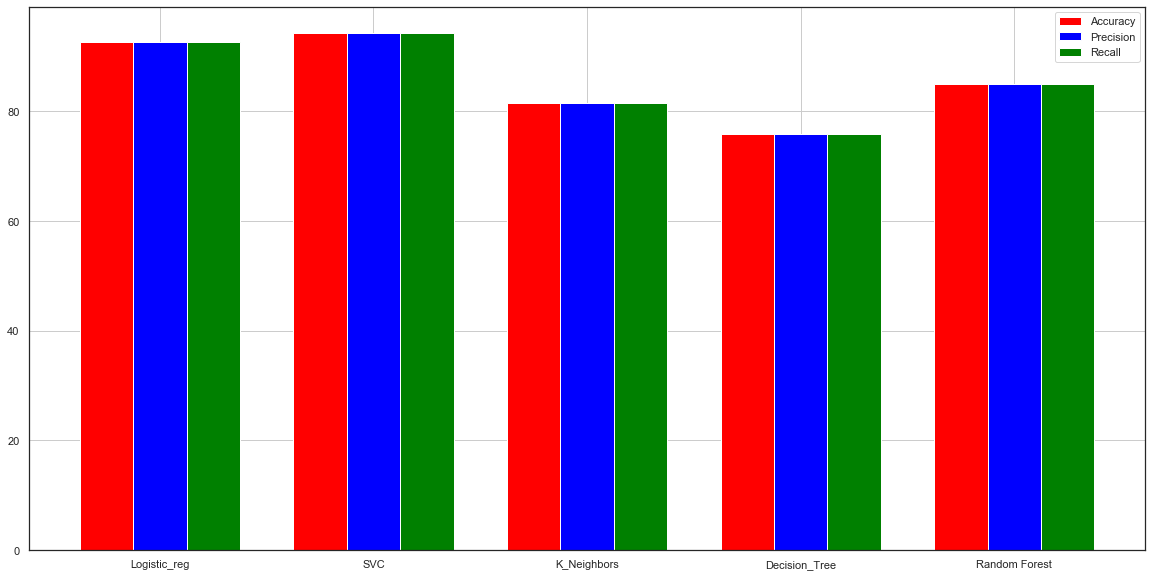

In [87]:
fig = plt.figure(figsize=(20,10))
r1 = np.arange(0, len(model_pca_accuracy))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

plt.bar(r1, model_pca_accuracy, color='red', width=0.25, edgecolor='white', label='Accuracy')
plt.bar(r2, model_pca_precision, color='blue', width=0.25, edgecolor='white', label='Precision')
plt.bar(r3, model_pca_recall, color='green', width=0.25, edgecolor='white', label='Recall')

plt.xticks([r + 0.25 for r in range(len(model_pca_accuracy))], ['Logistic_reg', 'SVC', 'K_Neighbors', 'Decision_Tree', 'Random Forest'])

# plt.bar(np.arange(len(model_accuracy)), model_accuracy)
# plt.bar(np.arange(len(model_accuracy)), model_precision)
# plt.bar(np.arange(len(model_accuracy)), model_recal)
# plt.xticks(np.arange(len(model_accuracy)), ['Logistic_reg', 'SVC', 'K_Neighbors', 'Decision_Tree'])
plt.legend()
plt.grid()
plt.show()

# Conclusion

From the above analysis, it was concluded that SVM best suited for this dataset followed by Logistic Regression and then ensemble algorithms. 